### 1. Import Libraries and File

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
pip install datapackage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 849.3 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 843.4 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 679.0 kB/s eta 0:00:000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 2.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 19.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10746 sha256=358497cf33c368a7fc8e1b5d65233

In [5]:
from datapackage import Package

package = Package('https://datahub.io/core/geo-countries/datapackage.json')

# print list of all resources:
print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())

['validation_report', 'geo-countries_zip', 'countries']


In [6]:
#Create path
path = '/Users/owner/Documents/Career foundry/Course 6'

In [7]:
# Import data

df = pd.read_csv(os.path.join(path, 'Cleaned Data', 'all_gun_violence_incidents_checked.csv'))

### 2. Check and Clean up data

In [8]:
df.head()

,Unnamed: 0,incident_id,date,state,city,address,people_killed,people_injured
0,0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1
1,1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1
2,2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
3,3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2
4,4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0


In [9]:
#remove unnamed columns
df_gunv= df.drop(columns = ['Unnamed: 0'])

In [11]:
df = pd.read_csv(os.path.join(path, 'Cleaned Data', 'gun_violence_totals.csv'))

In [12]:
df.head()

,Unnamed: 0,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
0,0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1,2022,5,28,5,1
1,1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1,2022,5,28,5,1
2,2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1,2022,5,28,5,1
3,3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2,2022,5,28,5,2
4,4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0,2022,5,28,5,1


In [14]:
#remove unnamed columns
df= df.drop(columns = ['Unnamed: 0'])

In [15]:
df.head()

,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1,2022,5,28,5,1
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1,2022,5,28,5,1
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1,2022,5,28,5,1
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2,2022,5,28,5,2
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0,2022,5,28,5,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471986 entries, 0 to 471985
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   incident_id     471986 non-null  int64 
 1   date            471986 non-null  object
 2   state           471986 non-null  object
 3   city            471986 non-null  object
 4   address         448268 non-null  object
 5   people_killed   471986 non-null  int64 
 6   people_injured  471986 non-null  int64 
 7   year            471986 non-null  int64 
 8   month           471986 non-null  int64 
 9   monthday        471986 non-null  int64 
 10  day_of_week     471986 non-null  int64 
 11  hurt            471986 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 43.2+ MB


In [17]:
df.describe()

,incident_id,people_killed,people_injured,year,month,monthday,day_of_week,hurt
count,4.719860e+05,471986.000000,471986.000000,471986.000000,471986.000000,471986.000000,471986.000000,471986.000000
mean,1.117248e+06,0.287172,0.562358,2017.731441,6.439755,15.742537,3.093318,0.849529
std,6.517663e+05,0.536055,0.758036,2.386056,3.376437,8.836538,2.029186,0.840783
min,9.211400e+04,0.000000,0.000000,2013.000000,1.000000,1.000000,0.000000,0.000000
25%,5.357345e+05,0.000000,0.000000,2016.000000,4.000000,8.000000,1.000000,0.000000
50%,1.066842e+06,0.000000,0.000000,2018.000000,6.000000,16.000000,3.000000,1.000000
75%,1.692565e+06,1.000000,1.000000,2020.000000,9.000000,23.000000,5.000000,1.000000
max,2.314864e+06,50.000000,53.000000,2022.000000,12.000000,31.000000,6.000000,103.000000


In [18]:
df.isnull().sum()

incident_id           0
date                  0
state                 0
city                  0
address           23718
people_killed         0
people_injured        0
year                  0
month                 0
monthday              0
day_of_week           0
hurt                  0
dtype: int64

In [26]:
#Check for duplicates
df_dups = df[df.duplicated()]

In [27]:
df_dups

,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt


In [28]:
df_dups.head()

,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt


In [30]:
df_dups.shape

(0, 12)

In [31]:
df.shape

(471986, 12)

In [37]:
df.isnull().sum()

incident_id           0
date                  0
state                 0
city                  0
address           23718
people_killed         0
people_injured        0
year                  0
month                 0
monthday              0
day_of_week           0
hurt                  0
dtype: int64

In [39]:
bool_series = pd.isnull(df["address"]) 

In [40]:
df[bool_series] 

,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
113,2314059,2022-05-27,Minnesota,Minneapolis,NaN,0,1,2022,5,27,4,1
142,2313351,2022-05-26,Louisiana,Baton Rouge,NaN,0,1,2022,5,26,3,1
398,2311216,2022-05-24,Louisiana,New Orleans,NaN,0,1,2022,5,24,1,1
400,2312549,2022-05-24,Louisiana,New Orleans,NaN,0,1,2022,5,24,1,1
457,2311101,2022-05-24,Maryland,Baltimore,NaN,0,1,2022,5,24,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
471728,972570,2013-12-01,Pennsylvania,Derry,NaN,1,0,2013,12,1,6,1
471730,495323,2013-11-30,Michigan,Lansing,NaN,0,5,2013,11,30,5,5
471797,479747,2013-09-12,Tennessee,Crab Orchard,NaN,4,0,2013,9,12,3,4
471897,487082,2013-05-29,Illinois,Chicago,NaN,0,4,2013,5,29,2,4


Keeping the data points even though they don't have addresses because they have city and state information and it's over 23,000 data points. 

### Check for extremes

<Axes: xlabel='people_killed', ylabel='Count'>

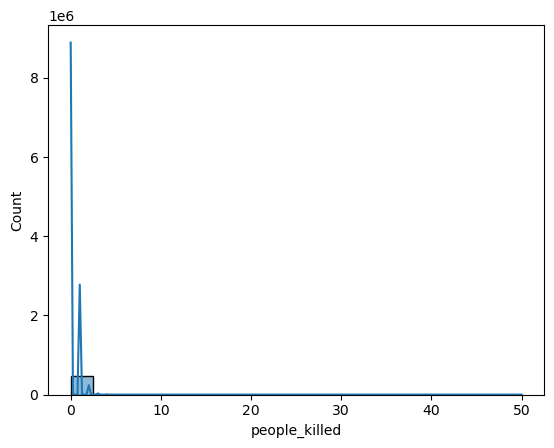

In [41]:
sns.histplot(df['people_killed'], bins=20, kde = True) # shows extreme values for people killed

In [43]:
# Check how many extreme values just for knowledge

df[df['people_killed'] >25]

,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
254733,980577,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20,2017,11,5,6,47
341436,577157,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53,2016,6,12,6,103


<Axes: xlabel='people_injured', ylabel='Count'>

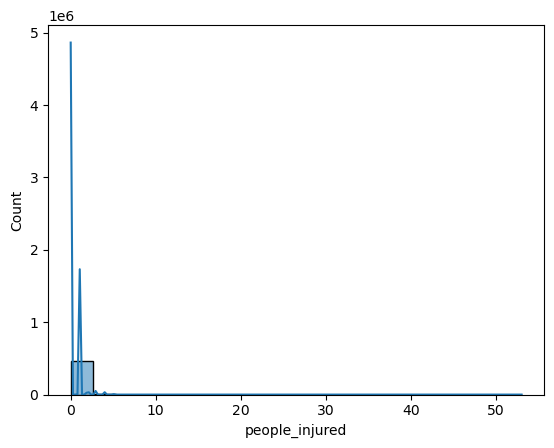

In [44]:
sns.histplot(df['people_injured'], bins=20, kde = True) # shows extreme values for people injured

In [45]:
# Check how many extreme values just for knowledge

df[df['people_injured'] >25]

,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
8989,2257739,2022-03-19,Arkansas,Dumas,611 Highway 65 S,1,26,2022,3,19,5,27
341436,577157,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53,2016,6,12,6,103


<Axes: xlabel='hurt', ylabel='Count'>

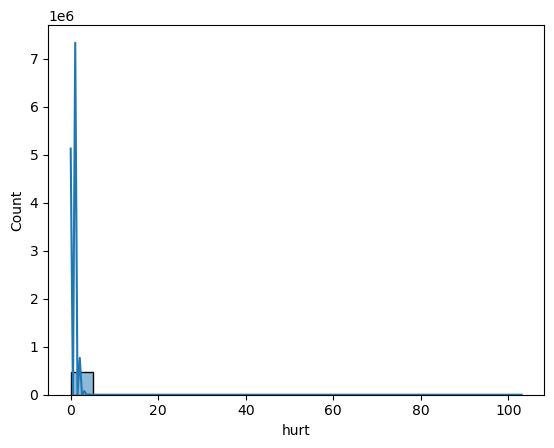

In [46]:
sns.histplot(df['hurt'], bins=20, kde = True) # shows extreme values for people hurt

In [47]:
# Check how many extreme values just for knowledge

df[df['hurt'] >25]

,incident_id,date,state,city,address,people_killed,people_injured,year,month,monthday,day_of_week,hurt
371,2310278,2022-05-24,Texas,Uvalde,715 Old Carrizo Rd,22,17,2022,5,24,1,39
8989,2257739,2022-03-19,Arkansas,Dumas,611 Highway 65 S,1,26,2022,3,19,5,27
154725,1492441,2019-08-31,Texas,Odessa,8250 TX 191,8,23,2019,8,31,5,31
159053,1467828,2019-08-04,Ohio,Dayton,419 E 5th St,10,17,2019,8,4,6,27
159322,1466705,2019-08-03,Texas,El Paso,7101 Gateway Blvd,23,23,2019,8,3,5,46
239331,1049217,2018-02-14,Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17,2018,2,14,2,34
254733,980577,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20,2017,11,5,6,47
341436,577157,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53,2016,6,12,6,103
370542,456893,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19,2015,12,2,2,35
401396,341622,2015-05-17,Texas,Waco,4671 S Jack Kultgen Fwy,9,18,2015,5,17,6,27


In [48]:
df.dtypes

incident_id        int64
date              object
state             object
city              object
address           object
people_killed      int64
people_injured     int64
year               int64
month              int64
monthday           int64
day_of_week        int64
hurt               int64
dtype: object

### Creating Chloropleth

In [77]:
# Create a data frame with just the states and the values for rating we want plotted

df[['state','hurt']]


,state,hurt
0,Arkansas,1
1,Colorado,1
2,Missouri,1
3,South Carolina,2
4,California,1
...,...,...
471981,North Carolina,4
471982,Colorado,4
471983,Ohio,4
471984,California,4


In [52]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'/Users/owner/Documents/Career foundry/us-states.json')
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [54]:
#Import ".json" file for the U.S. 

country_geo = r'/Users/owner/Documents/Career foundry/us-states.json'

In [70]:
#Create array
threshold_scale = np.linspace(df['hurt'].min(),
                             df['hurt'].max(),
                             6, dtype = int)
threshold_scale=threshold_scale.tolist() #change numpy array to list
threshold_scale[-1]=threshold_scale[-1]+1 #last value of list must be greater than max hurt


In [76]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [0, 0], zoom_start = 2, titles = 'Gun Violence Incidents')

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['state','hurt'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    threshold_scale=threshold_scale,
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

This shows a map of the number of occurances

In [81]:
# Import data

df_totals_killed = pd.read_csv(os.path.join(path, 'Cleaned Data', 'atable_people_killed_ordered.csv'))

In [82]:
df_totals_killed.head()

,state,people_killed
0,Vermont,120
1,Wyoming,139
2,North Dakota,153
3,Rhode Island,161
4,Hawaii,170


In [83]:
data_to_plot=df_totals_killed[['state','people_killed']]

In [84]:
data_to_plot.head()

,state,people_killed
0,Vermont,120
1,Wyoming,139
2,North Dakota,153
3,Rhode Island,161
4,Hawaii,170


In [85]:
#Create array
threshold_scale = np.linspace(df['people_killed'].min(),
                             df['people_killed'].max(),
                             6, dtype = int)
threshold_scale=threshold_scale.tolist() #change numpy array to list
threshold_scale[-1]=threshold_scale[-1]+1 #last value of list must be greater than max hurt


In [88]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [0, 0], zoom_start = 2, titles = 'Gun Violence Incidents')

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['state','people_killed'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [89]:
map.save('peopl_killed_data.html')

In [90]:
# Import data

df_totals_injured = pd.read_csv(os.path.join(path, 'Cleaned Data', 'atable_people_injured_ordered.csv'))

In [93]:
data_to_plot_injured=df_totals_injured[['state','people_injured']]

In [94]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [0, 0], zoom_start = 2, titles = 'Gun Violence Incidents')

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_injured,
    columns = ['state','people_injured'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [95]:
map.save('people_injured_data.html')

In [97]:
df_totals = df_totals_killed.merge(df_totals_injured)

In [98]:
df_totals

,state,people_killed,people_injured
0,Vermont,120,147
1,Wyoming,139,96
2,North Dakota,153,225
3,Rhode Island,161,581
4,Hawaii,170,191
5,South Dakota,186,217
6,New Hampshire,187,276
7,Maine,217,277
8,Montana,326,296
9,Idaho,345,332


In [99]:
df_totals['total_hurt'] = df_totals ['people_killed'] + df_totals['people_injured']

In [100]:
df_totals.head()

,state,people_killed,people_injured,total_hurt
0,Vermont,120,147,267
1,Wyoming,139,96,235
2,North Dakota,153,225,378
3,Rhode Island,161,581,742
4,Hawaii,170,191,361


In [101]:
data_to_plot_hurt=df_totals[['state','total_hurt']]

In [109]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [0, 0], zoom_start = 2, titles = 'Gun Violence Incidents')

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_hurt,
    columns = ['state','total_hurt'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [110]:
map.save('people_hurt_data.html')

I created three different Chloropleth maps for this exercise. I noticed that in the beginning when I first made the map, the total hurt for each state was incorrect. Then I imported the table with the people injured and people killed and combined it to make a total hurt table. Then I used this table to make a hurt, injured, and killed map. The hurt map includes those injured and killed. I noticed that Illinois had the darkest color in the last map which means the total of people injured and killed was the highest in Illinois and then Texas and California. I'm curious about the specific cities as well. 

In [111]:
df_totals.to_csv(os.path.join(path, 'Cleaned Data', 'total_injured_and_killed.csv'))